### Model Training

In [1]:
## Import Basic Library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the dataset
dataset = pd.read_csv("data/dataset.csv")
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
## Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
## Shape
dataset.shape

(545, 13)

In [5]:
## Statistics
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [6]:
## Missing Value
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
## Duplicate value
dataset.duplicated().sum()

np.int64(0)

In [8]:
## Importing module
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [9]:
## Dependent and Independent Features
X = dataset.drop('price',axis=1)
y = dataset['price']

In [10]:
X.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [11]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((408, 12), (137, 12))

In [12]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)       
    ]
)

In [13]:
X_train_scaled = preprocessor.fit_transform(X_train)

In [14]:
X_test_scaled = preprocessor.transform(X_test)

In [15]:
## Score Evalutaion function
def evalute_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    score = r2_score(true,predicted)
    return mae, rmse, score


In [16]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "SVR" : SVR(),
    "KNeighborsRegressor" :KNeighborsRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor(),
    "GradientBoostingRegressor" :GradientBoostingRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(verbose=False)
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evalute_model(y_train, y_train_pred)

    model_test_mae ,  model_test_rmse, model_test_r2 = evalute_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 992393.4724
- Mean Absolute Error: 726998.8038
- R2 Score: 0.6840
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1245949.1294
- Mean Absolute Error: 915955.8864
- R2 Score: 0.6631


Lasso
Model performance for Training set
- Root Mean Squared Error: 992393.4725
- Mean Absolute Error: 726998.3609
- R2 Score: 0.6840
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1245949.7646
- Mean Absolute Error: 915955.5502
- R2 Score: 0.6631


Ridge
Model performance for Training set
- Root Mean Squared Error: 992446.2900
- Mean Absolute Error: 726293.6603
- R2 Score: 0.6839
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1247197.7453
- Mean Absolute Error: 916149.4722
- R2 Score: 0.6625


SVR
Model performance for Training set
- Root Mean Squared Error: 1812585.4192
- Mean Absolute Error:

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,LinearRegression,0.663128
1,Lasso,0.663128
2,Ridge,0.662453
10,CatBoostRegressor,0.637816
8,GradientBoostingRegressor,0.610510
6,RandomForestRegressor,0.578980
4,KNeighborsRegressor,0.543951
9,XGBRegressor,0.537651
7,AdaBoostRegressor,0.532621
5,DecisionTreeRegressor,0.308129


In [18]:
## Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train_scaled,y_train)
y_pred = lin_model.predict(X_test_scaled)
score = r2_score(y_test,y_pred)*100
print("Accuracy Score of the model is %.2f"%score)

Accuracy Score of the model is 66.31


Text(0, 0.5, 'Predicted')

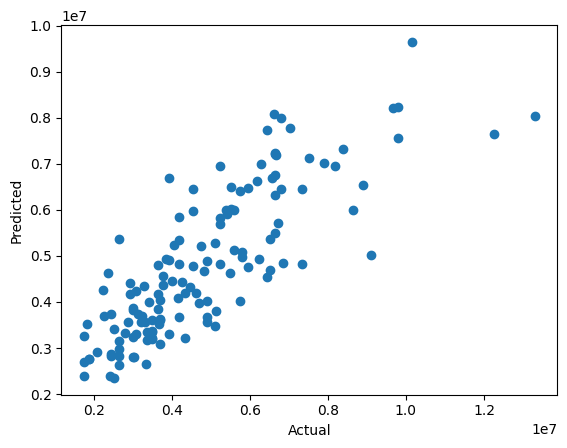

In [19]:
## Plot y_pred and y_test
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='price'>

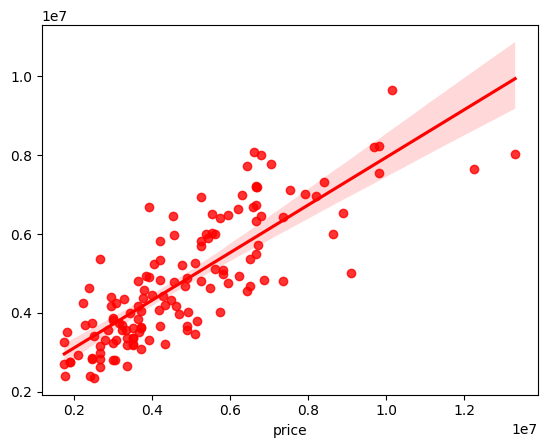

In [21]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,color="red")

In [22]:
pred_df = pd.DataFrame({'Actual value': y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted Value,Difference
316,4060000,5.244464e+06,-1.184464e+06
77,6650000,7.224190e+06,-5.741898e+05
360,3710000,3.091383e+06,6.186170e+05
90,6440000,4.548784e+06,1.891216e+06
493,2800000,3.321777e+06,-5.217770e+05
...,...,...,...
172,5250000,6.946980e+06,-1.696980e+06
124,5950000,6.479075e+06,-5.290747e+05
388,3500000,3.221848e+06,2.781522e+05
521,2408000,2.387397e+06,2.060302e+04
